In [3]:
%run IDM_helper_functions.ipynb

## LCA parameter recovery

In [23]:
# Training data
num_simulations = 1000000
#[0,0.5] for ∆I, [0,2] for I, [0,14] for κ and β, [0,1] for Z, and [0,1]
#prior = utils.BoxUniform(low=[0.05,0.05,1,1], high=[0.3,0.25,8,8])

prior = utils.BoxUniform(low=[1,0.999,0,-0.2,0.6,0.2], high=[2,1,0.4,0,2,0.5])
parameters = prior.sample((num_simulations,))
x = simul_LCA_full(np.array(parameters))

sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000
sim20000
sim21000
sim22000
sim23000
sim24000
sim25000
sim26000
sim27000
sim28000
sim29000
sim30000
sim31000
sim32000
sim33000
sim34000
sim35000
sim36000
sim37000
sim38000
sim39000
sim40000
sim41000
sim42000
sim43000
sim44000
sim45000
sim46000
sim47000
sim48000
sim49000
sim50000
sim51000
sim52000
sim53000
sim54000
sim55000
sim56000
sim57000
sim58000
sim59000
sim60000
sim61000
sim62000
sim63000
sim64000
sim65000
sim66000
sim67000
sim68000
sim69000
sim70000
sim71000
sim72000
sim73000
sim74000
sim75000
sim76000
sim77000
sim78000
sim79000
sim80000
sim81000
sim82000
sim83000
sim84000
sim85000
sim86000
sim87000
sim88000
sim89000
sim90000
sim91000
sim92000
sim93000
sim94000
sim95000
sim96000
sim97000
sim98000
sim99000
sim100000
sim101000
sim102000
sim103000
sim104000
sim105000
sim106000
sim107000
sim108000
sim109000
sim110000
sim

sim831000
sim832000
sim833000
sim834000
sim835000
sim836000
sim837000
sim838000
sim839000
sim840000
sim841000
sim842000
sim843000
sim844000
sim845000
sim846000
sim847000
sim848000
sim849000
sim850000
sim851000
sim852000
sim853000
sim854000
sim855000
sim856000
sim857000
sim858000
sim859000
sim860000
sim861000
sim862000
sim863000
sim864000
sim865000
sim866000
sim867000
sim868000
sim869000
sim870000
sim871000
sim872000
sim873000
sim874000
sim875000
sim876000
sim877000
sim878000
sim879000
sim880000
sim881000
sim882000
sim883000
sim884000
sim885000
sim886000
sim887000
sim888000
sim889000
sim890000
sim891000
sim892000
sim893000
sim894000
sim895000
sim896000
sim897000
sim898000
sim899000
sim900000
sim901000
sim902000
sim903000
sim904000
sim905000
sim906000
sim907000
sim908000
sim909000
sim910000
sim911000
sim912000
sim913000
sim914000
sim915000
sim916000
sim917000
sim918000
sim919000
sim920000
sim921000
sim922000
sim923000
sim924000
sim925000
sim926000
sim927000
sim928000
sim929000
sim930000


In [3]:
parameters.shape

torch.Size([100000, 6])

In [24]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior)
trainer = trainer.append_simulations(parameters, x)
mnle = trainer.train()

 Neural network successfully converged after 36 epochs.

In [6]:
mcmc_parameters = dict(num_chains=10,thin=10,warmup_steps=50,init_strategy="proposal")

## Simulate from ICA and fit with ICA

In [25]:
#prior = utils.BoxUniform(low=[1,1,0,0,0.6,0.2], high=[2,1,0.4,0.4,2,0.5])
LCA_parameters = prior.sample((20,))

n_trials = 1000
sim_num = 20

par_fitted = np.zeros((sim_num,6))

In [26]:
for i in range(sim_num):
    print(i)
    LCA_o = simul_LCA_full(np.tile(LCA_parameters[i,:], (n_trials,1))) # simulate LCA data
    mnle_posterior = trainer.build_posterior(
        mcmc_method="slice_np_vectorized", mcmc_parameters=mcmc_parameters, prior = prior
    )
    
    #mnle_samples = mnle_posterior.sample((num_samples,), x=x_o) # fit with IDM
    mnle_posterior.set_default_x(LCA_o)
    mnle_map = mnle_posterior.map()
    print(LCA_parameters[i,:])
    print(np.array(mnle_map))
    par_fitted[i,:] = np.array(mnle_map)

0
sim0


C:\Users\ra36qix\Documents\GitHub\sbi\sbi\utils\sbiutils.py:316: UserWarning: An x with a batch size of 1000 was passed. It will be interpreted as a batch of independent and identically
            distributed data X={x_1, ..., x_n}, i.e., data generated based on the
            same underlying (unknown) parameter. The resulting posterior will be with
            respect to entire batch, i.e,. p(theta | X).
  warnings.warn(


tensor([ 1.1426,  0.9999,  0.2543, -0.1619,  1.9320,  0.4452])
[ 1.0385256   0.99903303  0.39712784 -0.19926752  1.8745712   0.4396249 ]
1
sim0
tensor([ 1.6911,  0.9996,  0.2121, -0.1117,  0.7920,  0.2546])
[ 1.5570626   0.99900055  0.24529564 -0.02080247  0.76698726  0.25828886]
2
sim0
tensor([ 1.5142,  1.0000,  0.2712, -0.1670,  1.0524,  0.2839])
[ 1.4172608   0.9996472   0.00236508 -0.01215722  1.055702    0.2772851 ]
3
sim0
tensor([ 1.5689,  0.9997,  0.2384, -0.1942,  1.0661,  0.4980])
[ 1.687099    0.9990296   0.00182984 -0.0306178   1.0995367   0.4922396 ]
4
sim0
tensor([ 1.7524,  0.9999,  0.0519, -0.0480,  1.6275,  0.3401])
[ 1.577685    0.99965197  0.24598293 -0.15676665  1.5705945   0.35306978]
5
sim0
tensor([ 1.0717,  0.9996,  0.3877, -0.0334,  1.7293,  0.4635])
[ 1.0366963   0.9994176   0.3990105  -0.16990902  1.8237402   0.44176465]
6
sim0
tensor([ 1.8797,  0.9991,  0.1780, -0.1634,  1.5685,  0.2176])
[ 1.7255907   0.9997927   0.07771614 -0.0864168   1.5172143   0.22725476]

KeyboardInterrupt: 

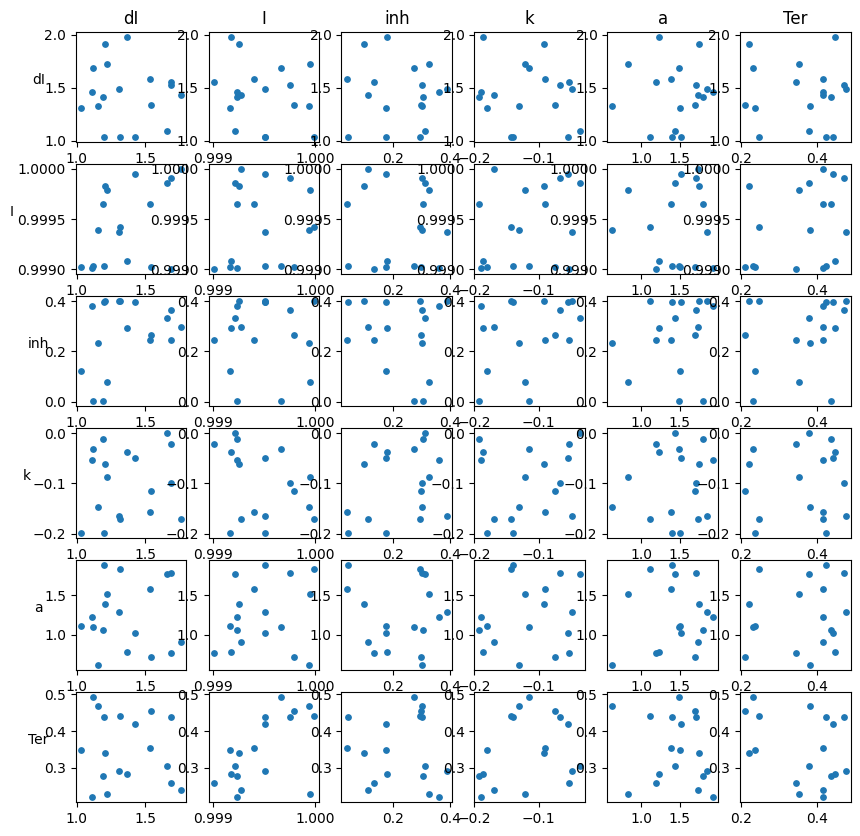

In [28]:
par_labels = ["dI", "I", "inh", "k","a","Ter"]
par_fitted_labels = ["dI", "I", "inh", "k","a","Ter"]
sim_fit_plot_all(parameters[:18,:], par_fitted[:18,:], par_labels, par_fitted_labels,s = 15)